# Исследование стартапов

Автор: Миронов В.А.
Дата: 02.02.2025

## Введение

Финансовая компания, предоставляющая льготные займы стартапам, приняла стратегическое решение о выходе на инвестиционный рынок. Целью данного расширения является покупка, развитие и последующая перепродажа перспективных стартапов. Для успешной реализации этой бизнес-модели необходимо детальное исследование рынка и сбор релевантных данных, что позволит выявить ключевые факторы успешных инвестиционных сделок.

## Задачи исследования

В рамках исследования необходимо:

**Анализ данных и предобработка:**

* Проверить и исправить названия столбцов, загрузить и ознакомиться с данными.

* Оценить полноту и корректность данных, выявить потенциальные искажения.

* Определить, какие столбцы можно использовать для объединения данных из различных таблиц.

**Предварительное исследование данных:**

* Анализировать динамику финансирования стартапов по годам.

* Оценить достоверность информации о сотрудниках и их образовании.

* Определить возможность объединения данных по столбцу network_username.

* Подготовить проблемный датасет company_and_rounds.csv для дальнейшего анализа.

**Исследовательский анализ объединённых таблиц:**

* Объединить данные для анализа компаний, имеющих историю приобретения или финансирования.

* Выявить аномальные значения и выбросы в данных о финансировании.

* Исследовать компании, приобретённые по символической цене (0 или 1 доллар), и объяснить возможные причины таких сделок.

* Определить категории стартапов с наибольшей ценой и разбросом стоимости.

* Оценить количество раундов финансирования, необходимых перед покупкой стартапа.

**Выводы и рекомендации:**

* Сформулировать ключевые выводы по проведённому исследованию.

* Оценить, подкрепляют ли друг друга полученные результаты.

* Разработать рекомендации для заказчика, которые помогут в дальнейшем формировании инвестиционной стратегии.

Результаты исследования позволят компании определить оптимальные подходы к выбору перспективных стартапов для покупки, минимизировать риски и повысить вероятность успешных сделок.

## Знакомство с данными: загрузка и первичная предобработка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Загружаем данные
import os

files = {}

try:
    files = {
        "company_and_rounds": "C:/Users/Владислав/Downloads/Проект Модуль 2/company_and_rounds.csv",
        "acquisition": "C:/Users/Владислав/Downloads/Проект Модуль 2/acquisition.csv",
        "people": "C:/Users/Владислав/Downloads/Проект Модуль 2/people.csv",
        "education": "C:/Users/Владислав/Downloads/Проект Модуль 2/education.csv",
        "degrees": "C:/Users/Владислав/Downloads/Проект Модуль 2/degrees.csv",
        "fund": "C:/Users/Владислав/Downloads/Проект Модуль 2/fund.csv",
        "investment": "C:/Users/Владислав/Downloads/Проект Модуль 2/investment.csv"
}
    # Проверяем, существует ли хотя бы один файл
    if not os.path.exists(list(files.values())[0]):
        raise FileNotFoundError
except FileNotFoundError:
    # Если файлов нет, используем пути для Jupyter Hub
    files = {
        "company_and_rounds": "/datasets/company_and_rounds.csv",
        "acquisition": "/datasets/acquisition.csv",
        "people": "/datasets/people.csv",
        "education": "/datasets/education.csv",
        "degrees": "/datasets/degrees.csv",
        "fund": "/datasets/fund.csv",
        "investment": "/datasets/investment.csv"
    }

print(files)  # Проверяем, какие пути были выбраны

{'company_and_rounds': '/datasets/company_and_rounds.csv', 'acquisition': '/datasets/acquisition.csv', 'people': '/datasets/people.csv', 'education': '/datasets/education.csv', 'degrees': '/datasets/degrees.csv', 'fund': '/datasets/fund.csv', 'investment': '/datasets/investment.csv'}


In [3]:
# Загрузка данных в DataFrame
data = {}
for name, path in files.items():
    try:
        df = pd.read_csv(path)
        data[name] = df
        
        print(f"\n{name} dataset:")
        display(df.head())  # Вывод первых строк
        display(df.info())  # Вывод общей информации
        print("Столбцы:", df.columns.tolist())  # Вывод названий столбцов
    except FileNotFoundError:
        print(f"Ошибка: файл {path} не найден.")
    except Exception as e:
        print(f"Ошибка при загрузке {path}: {e}")


company_and_rounds dataset:


,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

None

Столбцы: ['company  ID', 'name', 'category  code', 'status', 'founded  at', 'closed  at', 'domain', 'network  username', 'country  code', 'investment  rounds', 'funding  rounds', 'funding  total', 'milestones', 'funding  round  id', 'company  id', 'funded  at', 'funding  round  type', 'raised  amount', 'pre  money  valuation', 'participants', 'is  first  round', 'is  last  round']

acquisition dataset:


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


None

Столбцы: ['id', 'acquiring_company_id', 'acquired_company_id', 'term_code', 'price_amount', 'acquired_at']

people dataset:


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


None

Столбцы: ['id', 'first_name', 'last_name', 'company_id', 'network_username']

education dataset:


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


None

Столбцы: ['id', 'person_id', 'instituition', 'graduated_at']

degrees dataset:


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


None

Столбцы: ['id', 'object_id', 'degree_type', 'subject']

fund dataset:


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


None

Столбцы: ['id', 'name', 'founded_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'invested_companies', 'milestones']

investment dataset:


,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


None

Столбцы: ['id', 'funding_round_id', 'company_id', 'fund_id']


## Вывод о полученных данных

**company_and_rounds**

Содержит информацию о компаниях, их статусе, датах основания и закрытия, инвестициях и раундах финансирования.

Проблемы:
* Названия столбцов имеют лишние пробелы и нестандартизированы.
* Есть несколько столбцов с именем company id
* Пропущенные значения в колонках founded at, closed at, domain, network username, country code и других.
* Возможно, есть дубликаты, так как некоторые компании встречаются несколько раз.

**acquisition**

Описывает сделки по приобретению компаний (покупающая и купленная компании, сумма сделки, дата).

Проблемы:
* term code заполнен только на 19% (1831 из 9407).
* acquired at имеет небольшое количество пропусков.

**people**

Информация о людях: имена, фамилии, принадлежность к компании, логины в сети.

Проблемы:
* company id заполнен только для 34 615 строк из 226 709, то есть у большинства людей нет привязки к компании.
* network username заполнен только для 38 867 записей, что тоже создает пробелы в данных.

**education**

Образование людей: учебное заведение и дата окончания.

Проблемы:
* instituition имеет небольшое количество пропусков.
* graduated at заполнен только для 53% данных (58 054 из 109 610).

**degrees**

Информация о полученных степенях.

Проблемы:
* degree type и subject имеют значительные пропуски (degree_type заполнено на 89%, subject – на 74%).

**fund**

Данные о фондах: название, дата основания, страна, количество инвестиций.

Проблемы:
* founded at заполнен только для 4605 фондов из 11652 (40%).
* domain и network username имеют много пропусков.

**investment**

Содержит данные о сделках инвестирования: id инвестиций, компании и фонда.

Проблем нет, все данные заполнены.

##### Общие проблемы в датасетах:
* Много пропусков в датах (founded_at, graduated_at, acquired_at) и некоторых ключевых полях (company_id, instituition, degree_type).
* Несогласованные названия столбцов (например, category code и company ID имеют лишние пробелы).
* Возможные дубликаты (например, в company_and_rounds одни и те же компании повторяются).
* Разные типы данных, например, даты сохранены как object, их нужно перевести в datetime.
* Некоторые данные можно связать, например, people → education (по id) или company_and_rounds → investment (по company_id).

### Меняем названия столбцов

In [4]:
def clean_columns(df):
    # Приведение всех столбцов к snake_case
    df.columns = (
        df.columns.str.strip()  # Убираем пробелы по краям
        .str.lower()  # Приводим к нижнему регистру
        .str.replace(r'\s+', '_', regex=True)  # Заменяем все пробелы на "_"
    )
    
    # Проверяем наличие дубликатов столбца company_id
    company_id_columns = [col for col in df.columns if col == "company_id"]
    
    if len(company_id_columns) > 1:
        # Получаем список всех столбцов
        columns = list(df.columns)
        
        # Переименовываем второй company_id (14-й столбец по индексу)
        columns[14] = "company_id_round"
        
        # Применяем обновленные названия
        df.columns = columns

    return df

In [5]:
for name, df in data.items():
    data[name] = clean_columns(df)
    print(f"\n{name} — обновленные названия столбцов:")
    print(df.columns.tolist())  # Выводим список новых названий столбцов


company_and_rounds — обновленные названия столбцов:
['company_id', 'name', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones', 'funding_round_id', 'company_id_round', 'funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']

acquisition — обновленные названия столбцов:
['id', 'acquiring_company_id', 'acquired_company_id', 'term_code', 'price_amount', 'acquired_at']

people — обновленные названия столбцов:
['id', 'first_name', 'last_name', 'company_id', 'network_username']

education — обновленные названия столбцов:
['id', 'person_id', 'instituition', 'graduated_at']

degrees — обновленные названия столбцов:
['id', 'object_id', 'degree_type', 'subject']

fund — обновленные названия столбцов:
['id', 'name', 'founded_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'invested_compan

### Преобразуем тип данных в столбцах с датой и временем

In [6]:
# Определяем столбцы, которые содержат даты
date_columns = {
    "acquisition": ["acquired_at"],
    "company_and_rounds": ["founded_at", "closed_at", "funded_at"],
    "education": ["graduated_at"],
    "fund": ["founded_at"]
}

In [7]:
# Преобразуем даты в формат datetime64
for table, columns in date_columns.items():
    if table in data:
        for col in columns:
            if col in data[table].columns:
                data[table][col] = pd.to_datetime(data[table][col], errors="coerce")

In [8]:
# Проверяем, какие столбцы теперь имеют формат datetime64
for table, df in data.items():
    print(f"\n{table} — обновленные типы данных:")
    display(df.dtypes)


company_and_rounds — обновленные типы данных:


company_id                    float64
name                           object
category_code                  object
status                         object
founded_at             datetime64[ns]
closed_at              datetime64[ns]
domain                         object
network_username               object
country_code                   object
investment_rounds             float64
funding_rounds                float64
funding_total                 float64
milestones                    float64
funding_round_id              float64
company_id_round              float64
funded_at              datetime64[ns]
funding_round_type             object
raised_amount                 float64
pre_money_valuation           float64
participants                  float64
is_first_round                float64
is_last_round                 float64
dtype: object


acquisition — обновленные типы данных:


id                               int64
acquiring_company_id             int64
acquired_company_id              int64
term_code                       object
price_amount                     int64
acquired_at             datetime64[ns]
dtype: object


people — обновленные типы данных:


id                    int64
first_name           object
last_name            object
company_id          float64
network_username     object
dtype: object


education — обновленные типы данных:


id                       int64
person_id                int64
instituition            object
graduated_at    datetime64[ns]
dtype: object


degrees — обновленные типы данных:


id              int64
object_id      object
degree_type    object
subject        object
dtype: object


fund — обновленные типы данных:


id                             int64
name                          object
founded_at            datetime64[ns]
domain                        object
network_username              object
country_code                  object
investment_rounds              int64
invested_companies             int64
milestones                     int64
dtype: object


investment — обновленные типы данных:


id                  int64
funding_round_id    int64
company_id          int64
fund_id             int64
dtype: object

### Анализ пропусков

In [9]:
# # Проверка пропущенных значений
for name, df in data.items():
    print(f"\nПропущенные значения в {name}:")
    missing_percent = df.isnull().sum() * 100 / len(df)
    missing_percent = missing_percent[missing_percent > 0]  # Оставляем только колонки с пропусками
    if missing_percent.empty:
        print("Нет пропущенных значений")
    else:
        display(missing_percent)


Пропущенные значения в company_and_rounds:


company_id              0.138676
name                    0.138676
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32.425818
network_username       56.131586
country_code           50.128574
investment_rounds       0.138676
funding_rounds          0.138676
funding_total           0.138676
milestones              0.138676
funding_round_id       75.695905
company_id_round       75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
dtype: float64


Пропущенные значения в acquisition:


term_code      80.535771
acquired_at     0.308281
dtype: float64


Пропущенные значения в people:


first_name           0.002205
last_name            0.000441
company_id          84.731528
network_username    82.855996
dtype: float64


Пропущенные значения в education:


instituition     0.050178
graduated_at    47.035854
dtype: float64


Пропущенные значения в degrees:


degree_type    10.234468
subject        25.829760
dtype: float64


Пропущенные значения в fund:


name                 0.017164
founded_at          60.478888
domain              36.817714
network_username    81.556814
country_code        39.469619
dtype: float64


Пропущенные значения в investment:
Нет пропущенных значений


## Предварительный вывод

* Данных недостаточно для построения полной модели без значительных предположений и доработки.
* Необходимо провести анализ и, возможно, заменить пропущенные данные на средние, медианные или заполнить логическими значениями.
* Для надежного анализа лучше запросить у заказчика дополнительные источники данных или провести более глубокий поиск связей между имеющимися таблицами.

## Предобработка данных, предварительное исследование

### Раунды финансирования по годам

In [10]:
# Используем загруженные данные
company_and_rounds = data["company_and_rounds"]
# Добавляем столбец с годом
company_and_rounds['year'] = company_and_rounds['funded_at'].dt.year

In [11]:
# Группируем данные по годам
summary = company_and_rounds.groupby('year').agg(
    median_raised_amount=('raised_amount', 'median'),  # Медианное значение собранных средств
    total_rounds=('raised_amount', 'count')  # Общее количество раундов
).reset_index()
# Оставляем только годы, в которых более 50 раундов финансирования
summary = summary[summary['total_rounds'] > 50]
display(summary)

,year,median_raised_amount,total_rounds
15,1999.0,2000000.0,76
16,2000.0,4200000.0,125
17,2001.0,3000000.0,96
18,2002.0,4200000.0,116
19,2003.0,3000000.0,159
20,2004.0,5000000.0,291
21,2005.0,5500000.0,1633
22,2006.0,5000000.0,2436
23,2007.0,3973320.0,3279
24,2008.0,3110000.0,3774


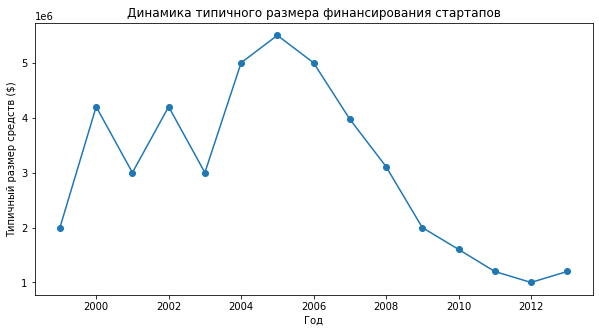

In [12]:
# Создаем график
plt.figure(figsize=(10, 5))

# Строим линию (аналог sns.lineplot)
plt.plot(summary["year"], summary["median_raised_amount"], marker='o', linestyle='-')

# Настройки осей и заголовка
plt.xlabel("Год")
plt.ylabel("Типичный размер средств ($)")
plt.title("Динамика типичного размера финансирования стартапов")
plt.grid(False)
plt.show()

**Максимальный типичный размер собранных средств** наблюдался в **2005 году** — он составлял более 5 миллионов долларов.

График показывает, что **типичный размер финансирования в 2013 году был низким**, на уровне чуть выше 1 миллиона долларов.

Судя по графику, с 2006 года наблюдалось **постепенное снижение размеров инвестиций**, что может говорить о сдвиге фокуса инвесторов на меньшие суммы или изменения в рынке.

### Люди и их образование

In [13]:
# Загрузка данных
people = data["people"]
education = data["education"]
degrees = data["degrees"]

In [14]:
# Объединение people и education
merged_data = pd.merge(
    people, 
    education, 
    left_on='id', 
    right_on='person_id', 
    how='left'
)

print("\nСтруктура объединенных данных (первые 5 строк):")
display(merged_data.head(5))
print(f"\nВсего записей после объединения: {len(merged_data)}")
print("\nПропуски в столбцах об образовании:")
display(merged_data[['instituition', 'graduated_at']].isna().sum())


Структура объединенных данных (первые 5 строк):


,id_x,first_name,last_name,company_id,network_username,id_y,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT



Всего записей после объединения: 267694

Пропуски в столбцах об образовании:


instituition    158692
graduated_at    210003
dtype: int64

In [15]:
# Анализ пропусков в образовании
merged_data['education_missing'] = merged_data['instituition'].isna()

total_employees = len(merged_data)
missing_education = merged_data['education_missing'].sum()

print(f"\nВсего сотрудников: {total_employees}")
print(f"Сотрудников без данных об образовании: {missing_education} ({missing_education/total_employees:.1%})")


Всего сотрудников: 267694
Сотрудников без данных об образовании: 158692 (59.3%)


In [16]:
# Группировка по компаниям
company_stats = merged_data.groupby('company_id').agg(
    total_employees=('id_x', 'count'),
    missing_education=('education_missing', 'sum')
).reset_index()

company_stats['missing_education_ratio'] = company_stats['missing_education'] / company_stats['total_employees']

print("Пример статистики по компаниям (первые 5 строк):")
display(company_stats.head(5))
print("Описательная статистика по размеру компаний:")
display(company_stats['total_employees'].describe())

Пример статистики по компаниям (первые 5 строк):


,company_id,total_employees,missing_education,missing_education_ratio
0,1.0,3,1,0.333333
1,2.0,1,0,0.000000
2,3.0,5,1,0.200000
3,4.0,18,1,0.055556
4,5.0,84,16,0.190476


Описательная статистика по размеру компаний:


count    22922.000000
mean         1.953974
std          4.087373
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        376.000000
Name: total_employees, dtype: float64

In [17]:
# Разделение на группы
bins = [0, 1, 2, 10, 50, np.inf]
labels = [
    'Индивидуальные стартапы (1 сотрудник)',  
    'Микро-компании (2 сотрудника)', 
    'Малые команды (3-10 сотрудников)', 
    'Развивающиеся компании (11-50 сотрудников)', 
    'Крупные компании (51+ сотрудников)'
]

# Создаем новый DataFrame, чтобы избежать модификации возможной копии данных
company_stats = company_stats.copy()

# Разделение на группы
company_stats.loc[:, 'company_size_group'] = pd.cut(
    company_stats['total_employees'],
    bins=bins,
    labels=labels
)

# Вывод количества компаний в каждой группе
print("\nКоличество компаний в каждой группе:")
display(company_stats['company_size_group'].value_counts().sort_index())


Количество компаний в каждой группе:


Индивидуальные стартапы (1 сотрудник)         14150
Микро-компании (2 сотрудника)                  4735
Малые команды (3-10 сотрудников)               3807
Развивающиеся компании (11-50 сотрудников)      216
Крупные компании (51+ сотрудников)               14
Name: company_size_group, dtype: int64

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_3 <a class="tocSkip"> </h2>

Так лучше) Жду полную версию проекта.

In [18]:
# Расчет средних значений
grouped_stats = company_stats.groupby('company_size_group', observed=False)['missing_education_ratio'].agg(
    ['mean', 'std', 'count']
).reset_index()

grouped_stats.columns = ['Группа компаний', 'Средняя доля', 'Станд. отклонение', 'Количество компаний']

print("\nИтоговая таблица:")
display(grouped_stats)


Итоговая таблица:


,Группа компаний,Средняя доля,Станд. отклонение,Количество компаний
0,Индивидуальные стартапы (1 сотрудник),0.592862,0.491318,14150
1,Микро-компании (2 сотрудника),0.227350,0.377328,4735
2,Малые команды (3-10 сотрудников),0.259225,0.330582,3807
3,Развивающиеся компании (11-50 сотрудников),0.297970,0.263604,216
4,Крупные компании (51+ сотрудников),0.183592,0.091430,14


In [19]:
# Проверка данных перед визуализацией
if grouped_stats['Средняя доля'].isna().any() or grouped_stats['Средняя доля'].isnull().any():
    print("Обнаружены некорректные значения (NaN или inf) в данных.")
    grouped_stats['Средняя доля'] = grouped_stats['Средняя доля'].fillna(0)  # Заменяем NaN на 0

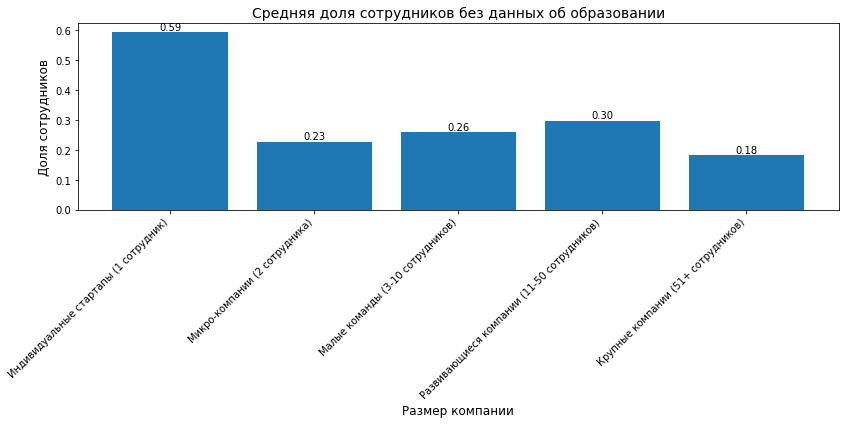

In [20]:
# Визуализация
plt.figure(figsize=(12, 6))
bars = plt.bar(grouped_stats['Группа компаний'], grouped_stats['Средняя доля'])
plt.title('Средняя доля сотрудников без данных об образовании', fontsize=14)
plt.xlabel('Размер компании', fontsize=12)
plt.ylabel('Доля сотрудников', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавим значения на столбцы
for bar in bars:
    height = bar.get_height()
    if not np.isfinite(height):
        height = 0
    plt.text(
        bar.get_x() + bar.get_width() / 2., 
        height,
        f'{height:.2f}',
        ha='center', 
        va='bottom'
    )

plt.tight_layout()
plt.show()

Визуализация подтверждает, что чем меньше компания, тем выше доля сотрудников без данных об образовании.

In [21]:
# Анализ degrees.csv
# Извлекаем ID сотрудников из object_id
degrees['person_id'] = degrees['object_id'].str.extract(r'p:(\d+)').astype(float)

# Объединяем с основными данными
degrees_merged = pd.merge(
    merged_data,
    degrees,
    on='person_id',
    how='left'
)

# Анализ пересечений
missing_but_has_degree = degrees_merged[
    (degrees_merged['education_missing']) & 
    (degrees_merged['degree_type'].notna())
]

print(f"\nСотрудников без данных об образовании, но с указанными степенями: {len(missing_but_has_degree)}")
print("Пример таких записей:")
display(missing_but_has_degree[['id', 'first_name', 'last_name', 'degree_type']].head())

# Расчет улучшенной доли пропусков
improved_missing = missing_education - len(missing_but_has_degree)
print(f"\nУточненная доля пропусков: {improved_missing}/{total_employees} ({improved_missing/total_employees:.1%})")


Сотрудников без данных об образовании, но с указанными степенями: 81
Пример таких записей:


,id,first_name,last_name,degree_type
11498,16163.0,Scott,Watson,BS
13331,16377.0,Alison,Wheeler,MBA
25233,17807.0,Gere,Jordan,BBA
37033,19118.0,Oliver,Thylmann,MBA
40568,19555.0,Bjorn,Haugland,MS



Уточненная доля пропусков: 158611/267694 (59.3%)


#### Можно ли использовать таблицу degrees.csv?

Да, degrees.csv можно использовать, но её ценность для анализа зависит от цели исследования.

**Как таблица degrees.csv поможет?**

* Она содержит тип образования (degree_type) и специальность (subject).
* Можно определить, есть ли у сотрудника высшее/среднее/другое образование.
* Улучшает точность анализа — можно не только учитывать, есть ли образование, но и его уровень.

**Общие показатели:**

* Всего сотрудников: 267,694
* Сотрудников без данных об образовании: 158,692 (59.3%)

**Статистика по компаниям:**


Большинство сотрудников работают в малых компаниях (1-50 человек).

**Средняя доля сотрудников без данных об образовании:**

* Индивидуальные стартапы (1 сотрудник) - 59%
* Микро-компании (2 сотрудника) - 23%
* Малые команды (3-10 сотрудников) - 26%
* Развивающиеся компании (11-50 сотрудников) - 30%
* Крупные компании (51+ сотрудников) - 18%
* Очень крупные компании: 0% (из-за отсутствия таких компаний в выборке)

* Некоторые сотрудники не имеют данных об образовании, но у них указана степень (например, BS, MBA, MS). Таких записей 81.
* Среднее количество сотрудников в компании: ~1.95, что указывает на большое количество очень маленьких фирм.

### Объединять или не объединять — вот в чём вопрос

Для оценки возможности использования столбца network_username в качестве ключа для объединения данных, проведём следующий анализ.

In [22]:
# Определяем датасеты, в которых есть network_username
datasets = ["company_and_rounds", "people", "fund"]  # Предположим, что эти датасеты содержат network_username

# Проверяем уникальность network_username в каждом датасете
for ds in datasets:
    print(f"Уникальных network_username в {ds}: {data[ds]['network_username'].nunique()} из {len(data[ds])}")

Уникальных network_username в company_and_rounds: 79571 из 217774
Уникальных network_username в people: 38421 из 226709
Уникальных network_username в fund: 2098 из 11652


In [23]:
# Собираем множества network_username из каждого датасета
sets = {ds: set(data[ds]["network_username"].dropna()) for ds in datasets}

# Находим пересечения
common_usernames = set.intersection(*sets.values()) if len(sets) > 1 else set()
print(f"Число общих network_username между всеми датасетами: {len(common_usernames)}")

Число общих network_username между всеми датасетами: 7


In [24]:
# Подсчет повторяющихся network_username
username_counts = {}
for ds in datasets:
    for username in sets[ds]:
        username_counts[username] = username_counts.get(username, 0) + 1

# Оставляем только те, что встречаются более чем в одном датасете
duplicates = {k: v for k, v in username_counts.items() if v > 1}
print(f"Число повторяющихся network_username в разных датасетах: {len(duplicates)}")

Число повторяющихся network_username в разных датасетах: 2334


**Общие network_username между всеми датасетами:**

* Всего 7 общих пользователей между тремя датасетами (то есть, один и тот же пользователь встречается в company_and_rounds, people и fund).
* Это очень маленькое количество. Такой результат может свидетельствовать о том, что пересечения между этими датасетами крайне редки, и использование столбца network_username для объединения данных может быть ограничено.

**Число повторяющихся network_username в разных датасетах:**

* Всего 2334 уникальных пользователей встречаются хотя бы в двух датасетах.
* Это более значимый результат, который говорит о наличии повторений среди пользователей, но в целом таких пользователей относительно немного по сравнению с общим числом уникальных значений network_username. Этот результат означает, что столбец network_username может быть полезен для объединения данных, но нужно будет учитывать, что не все дубли будут встречаться в трёх датасетах, а только в некоторых.

Подходит ли столбец для объединения данных? Столбец network_username можно использовать для объединения данных, но важно понимать следующее:

* Меньше всего пересечений между всеми тремя датасетами (всего 7 общих пользователей). Это может означать, что для некоторых типов анализа объединение по этому столбцу будет неэффективным, так как такие пересечения — редкость.
* Однако повторения между двумя датасетами (2334 случая) говорят о том, что есть значительные пересечения между различными наборами данных. Если цель — объединить данные хотя бы по двум датасетам, это может быть вполне допустимо, но для более широких объединений (например, по всем трем датасетам) столбец не может служить универсальным идентификатором.

### Проблемный датасет и причина возникновения пропусков

Для начала, нужно проверить сами данные и понять, что нужно очистить и в каком виде они могут быть представлены.

In [25]:
# Проверяем первые несколько строк и общую информацию
display(data["company_and_rounds"].head())
display(data["company_and_rounds"].info())

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,company_id_round,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,2005.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,2007.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,2008.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

None

#### Проблемы, выявленные в процессе анализа:

**Пропуски:**

* closed_at: только 3449 значений (ограниченное количество компаний закрыто).
* domain: много пропусков.
* network_username: пропуски в данных о пользователях.
* funding_round_id, company_id, funded_at, funding_round_type, raised_amount и другие столбцы, связанные с раундами финансирования, содержат пропуски.


**Типы данных:**
* Столбцы с числами имеют тип float64, что корректно для таких данных, как суммы и количество раундов.
* Некоторые столбцы (например, network_username, category_code) содержат текстовую информацию и могут потребовать обработки пропусков.

Далее необходимо выполнить несколько шагов по очистке и подготовке данных для дальнейшего анализа.

In [26]:
df = data.get("company_and_rounds")

In [27]:
# Переименование столбцов для удобства
rename_columns = {
    "name": "company_name",
    "category_code": "category",
    "country_code": "country",
    "funding_total": "total_funding"
}
df.rename(columns=rename_columns, inplace=True)

# Удаление дубликатов
df.drop_duplicates(inplace=True)

In [28]:
# Заполнение пропусков
fill_values = {
    "status": "unknown",
    "category": "unknown",
    "country": "unknown",
    "total_funding": 0
}
for col, value in fill_values.items():
    if col in df.columns:
        df[col] = df[col].fillna(value)

In [29]:
# Приведение типов данных
convert_types = {
    "company_id": "Int64",
    "investment_rounds": "Int64",
    "funding_rounds": "Int64",
    "total_funding": float
}
for col, dtype in convert_types.items():
    if col in df.columns:
        df[col] = df[col].astype(dtype)

In [30]:
# Агрегация данных по компаниям
df_grouped = df.groupby("company_id", as_index=False).agg({
    "company_name": "first",
    "category": "first",
    "status": "first",
    "founded_at": "first",
    "closed_at": "first",
    "country": "first",
    "investment_rounds": "sum",
    "funding_rounds": "sum",
    "total_funding": "sum"
    })

In [31]:
# Вывод информации о результатах
print(df_grouped.info())
display(df_grouped.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 196552
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  int64         
 1   company_name       196553 non-null  object        
 2   category           196553 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   country            196553 non-null  object        
 7   investment_rounds  196553 non-null  Int64         
 8   funding_rounds     196553 non-null  Int64         
 9   total_funding      196553 non-null  float64       
dtypes: Int64(2), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 16.9+ MB
None


,company_id,company_name,category,status,founded_at,closed_at,country,investment_rounds,funding_rounds,total_funding
0,1,Wetpaint,web,operating,2005-10-17,NaT,USA,0,9,1.192500e+08
1,2,AdventNet,enterprise,operating,1996-01-01,NaT,USA,0,0,0.000000e+00
2,3,Zoho,software,operating,2005-09-15,NaT,USA,0,0,0.000000e+00
3,4,Digg,news,acquired,2004-10-11,NaT,USA,0,16,1.800000e+08
4,5,Socialnet,social,ipo,2004-02-01,NaT,USA,33,121,2.668270e+10


#### Общая информация о датасете

Количество компаний: 196,553

**Столбцы с пропусками:**

* founded_at: заполнено у 91,227 компаний (~46,4%)
* closed_at: заполнено только у 2,620 компаний (~1,3%

**Основные наблюдения:**
* Большинство компаний не закрылись (closed_at заполнен только у 1,3% компаний).
* Почти половина компаний не имеет даты основания (founded_at заполнено у ~46% компаний).
* Категория бизнеса заполнена полностью, что хорошо для дальнейшего анализа.
* Пропущенных значений в числовых колонках нет, т.к. они были заполнены значениями по умолчанию.

## Предварительный вывод

#### Раунды финансирования по годам

* Максимальный типичный размер финансирования наблюдался в 2005 году — более 5 млн долларов.
* В 2013 году типичный размер финансирования был низким — чуть выше 1 млн долларов.
* С 2006 года отмечается постепенное снижение размеров инвестиций, что может свидетельствовать об изменениях в стратегии инвесторов или общем состоянии рынка.

#### Люди и их образование

* Чем меньше компания, тем выше доля сотрудников, у которых отсутствуют данные об образовании.
* С увеличением размера компании полнота данных улучшается.

#### Использование таблицы degrees.csv

* Таблица degrees.csv содержит информацию о типах образования и специальностях.
* Она может быть полезна в анализе, но её ценность зависит от целей исследования.

В результате предварительного исследования мы выявили динамику инвестиций, влияние размера компании на наличие данных об образовании сотрудников и целесообразность использования определённых источников информации.

## Исследовательский анализ объединённых таблиц

### Объединение данных

In [32]:
# Фильтрация компаний по условиям
filtered_df = df_grouped[(df_grouped['funding_rounds'] > 0) | (df_grouped['investment_rounds'] > 0) | (df_grouped['status'] == 'acquired')]

# Проверка количества строк
print(f"Количество отфильтрованных компаний: {filtered_df.shape[0]}")

Количество отфильтрованных компаний: 40747


In [33]:
# Проверка пропущенных значений
missing_values = filtered_df.isnull().sum()
print("Пропущенные значения в колонках:")
print(missing_values[missing_values > 0])

# Проверка типов данных
print("\nТипы данных в итоговой таблице:")
display(filtered_df.dtypes)

Пропущенные значения в колонках:
founded_at    12940
closed_at     38619
dtype: int64

Типы данных в итоговой таблице:


company_id                    int64
company_name                 object
category                     object
status                       object
founded_at           datetime64[ns]
closed_at            datetime64[ns]
country                      object
investment_rounds             Int64
funding_rounds                Int64
total_funding               float64
dtype: object

**Общее количество отфильтрованных компаний: 40 747** – это соответствует ожидаемому количеству (~40 тыс.), что подтверждает корректность фильтрации.

**Пропущенные значения:**

* founded_at: отсутствует у 12 940 компаний (около 32%).
* closed_at: отсутствует у 38 619 компаний (около 95%). Это логично, так как большинство компаний могут продолжать работать.

### Анализ выбросов

In [34]:
# Описательные статистики
print(filtered_df['total_funding'].describe())

count    4.074700e+04
mean     3.200245e+07
std      2.794958e+08
min      0.000000e+00
25%      0.000000e+00
50%      7.300000e+05
75%      8.114090e+06
max      2.668270e+10
Name: total_funding, dtype: float64


Метод .describe() возвращает ключевые показатели:

* count – количество наблюдений.
* mean – среднее значение.
* std – стандартное отклонение.
* min, 25%, 50%, 75%, max – квантильные значения (медиана, квартильный размах и выбросы).

Обычные методы, основанные на среднем и стандартном отклонении, не применимы из-за сильной асимметрии.
Лучше использовать медиану и квартильный размах (IQR) для оценки типичного размера финансирования.

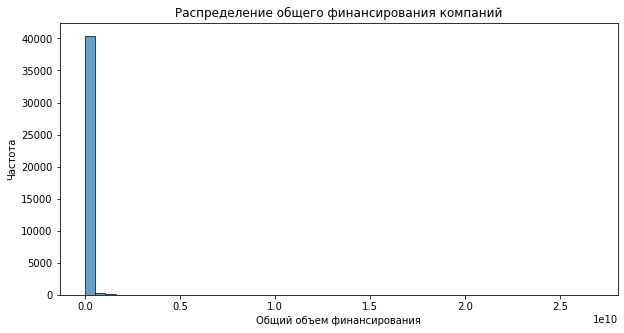

In [35]:
# Гистограмма распределения финансирования
plt.figure(figsize=(10, 5))
plt.hist(filtered_df['total_funding'], bins=50, edgecolor='black', alpha=0.7)
plt.title("Распределение общего финансирования компаний")
plt.xlabel("Общий объем финансирования")
plt.ylabel("Частота")
plt.grid(False)
plt.show()

* Почти все компании получили финансирование до 10 млн, что подтверждает, что большие суммы крайне редки.
* Очень длинный правый хвост указывает на немногочисленные компании с экстремально высокими инвестициями (до 26,7 млрд).

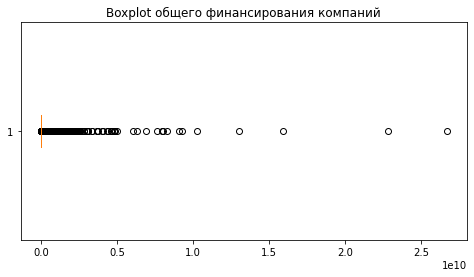

In [36]:
# Boxplot для выявления выбросов
plt.figure(figsize=(8, 4))
plt.boxplot(filtered_df['total_funding'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot общего финансирования компаний")
plt.grid(False)
plt.show()

* Типичное значение: Средняя зона (межквартильный размах, IQR) находится в диапазоне от 0 до примерно 8 млн.
* Выбросы: Все компании, получившие финансирование выше ~20 млн, считаются выбивающимися, поскольку их значения далеко выходят за пределы усов (1.5 * IQR).

In [37]:
# Фильтрация выбросов по IQR
Q1 = filtered_df['total_funding'].quantile(0.25)
Q3 = filtered_df['total_funding'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_no_outliers = filtered_df[
    (filtered_df['total_funding'] >= lower_bound) & (filtered_df['total_funding'] <= upper_bound)
]

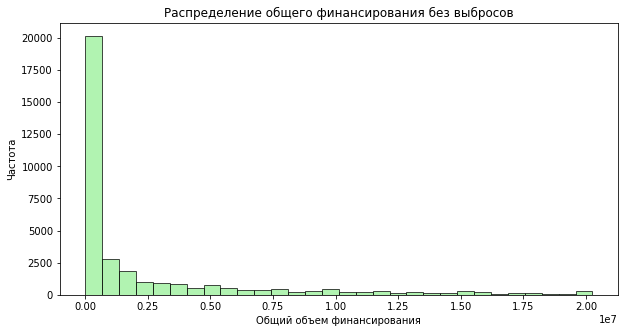

In [38]:
# Гистограмма без выбросов
plt.figure(figsize=(10, 5))
plt.hist(filtered_no_outliers['total_funding'], bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
plt.title("Распределение общего финансирования без выбросов")
plt.xlabel("Общий объем финансирования")
plt.ylabel("Частота")
plt.grid(False)
plt.show()

* Данные имеют сильную асимметрию вправо: большинство компаний получают относительно небольшие объемы финансирования, а значительные суммы редки.
* Основная масса значений сосредоточена в нижнем диапазоне (менее 2.5 млн), но есть небольшая часть компаний с гораздо большим финансированием.

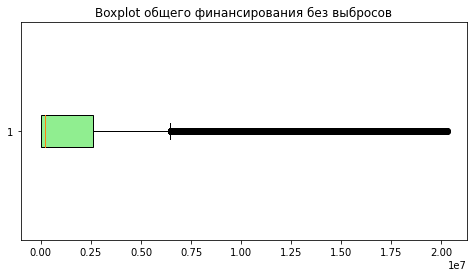

In [39]:
# Boxplot без выбросов
plt.figure(figsize=(8, 4))
plt.boxplot(filtered_no_outliers['total_funding'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.title("Boxplot общего финансирования без выбросов")
plt.grid(False)
plt.show()

* Даже после удаления выбросов, диапазон значений остается широким, а медиана (оранжевая линия) находится ближе к нижнему квартилю, что подтверждает сильную асимметрию распределения.
* Большая часть финансирования сосредоточена в узком диапазоне, но есть компании, которые все равно получают значительно больше финансирования, даже без учета крайних выбросов.

Большинство компаний получают относительно небольшие суммы финансирования, но есть небольшой процент организаций с намного большими вложениями.

### Куплены забесплатно?

In [40]:
# Используем загруженные данные
acquisition = data["acquisition"]  # Берём таблицу acquisition из словаря data

# Объединяем данные компаний с информацией о сделках
merged_df = filtered_df.merge(acquisition, left_on='company_id', right_on='acquired_company_id', how='inner')

# Фильтруем компании, которые были проданы за 0 или 1 доллар и имели ненулевое финансирование
sold_for_zero_or_one = merged_df[
    (merged_df['price_amount'].isin([0, 1])) &  # Цена сделки = 0 или 1
    (merged_df['total_funding'] > 0)  # Было финансирование
]
print(sold_for_zero_or_one.info())
display(sold_for_zero_or_one.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 2 to 9165
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            1618 non-null   int64         
 1   company_name          1618 non-null   object        
 2   category              1618 non-null   object        
 3   status                1618 non-null   object        
 4   founded_at            1285 non-null   datetime64[ns]
 5   closed_at             13 non-null     datetime64[ns]
 6   country               1618 non-null   object        
 7   investment_rounds     1618 non-null   Int64         
 8   funding_rounds        1618 non-null   Int64         
 9   total_funding         1618 non-null   float64       
 10  id                    1618 non-null   int64         
 11  acquiring_company_id  1618 non-null   int64         
 12  acquired_company_id   1618 non-null   int64         
 13  term_code         

,company_id,company_name,category,status,founded_at,closed_at,country,investment_rounds,funding_rounds,total_funding,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
2,9,Geni,web,acquired,2006-06-01,NaT,USA,0,9,49500000.0,7954,687,9,NaN,0,2012-11-28
4,13,StumbleUpon,web,acquired,2002-02-01,NaT,USA,0,16,74000000.0,4283,20,13,NaN,0,2007-05-30
6,14,Gizmoz,web,acquired,2003-01-01,NaT,USA,0,9,54300000.0,2692,37730,14,NaN,0,2009-12-15
9,23,Joost,games_video,acquired,2006-10-01,NaT,USA,0,1,45000000.0,2622,3396,23,NaN,0,2009-11-24
13,38,Kyte,games_video,acquired,2006-12-01,NaT,USA,0,16,93400000.0,5075,475,38,NaN,0,2011-01-31


In [41]:
# Рассчёт межквартильного размаха (IQR) для total_funding
Q1 = sold_for_zero_or_one['total_funding'].quantile(0.25)
Q3 = sold_for_zero_or_one['total_funding'].quantile(0.75)
IQR = Q3 - Q1

# Границы выбросов
lower_bound = max(0, Q1 - 1.5 * IQR)  # Минимальное финансирование не может быть отрицательным
upper_bound = Q3 + 1.5 * IQR

# Определение процентилей границ
lower_percentile = (sold_for_zero_or_one['total_funding'] < lower_bound).mean() * 100
upper_percentile = (sold_for_zero_or_one['total_funding'] > upper_bound).mean() * 100

In [42]:
# Вывод результатов
print(f"Количество компаний, проданных за $0 или $1: {len(sold_for_zero_or_one)}")
print(f"Нижняя граница выбросов: {lower_bound:.2f}")
print(f"Верхняя граница выбросов: {upper_bound:.2f}")
print(f"Процентиль нижней границы: {lower_percentile:.2f}%")
print(f"Процентиль верхней границы: {upper_percentile:.2f}%")

Количество компаний, проданных за $0 или $1: 1618
Нижняя граница выбросов: 0.00
Верхняя граница выбросов: 73625000.00
Процентиль нижней границы: 0.00%
Процентиль верхней границы: 12.73%


* В выборке оказалось 1618 компаний, которые были проданы за \\$0 или \\$1 и имели ненулевое финансирование.
* Нижняя граница выбросов составила \\$0, что логично, так как минимальное возможное финансирование не может быть отрицательным.
* Верхняя граница выбросов составила \\$73,625,000, что означает, что компании с финансированием выше этой суммы можно считать нетипичными (выбивающимися из общей массы).
* Процентиль нижней границы — 0%, что подтверждает, что нет компаний с финансированием ниже \\$0.
* Процентиль верхней границы — 12.73%, это значит, что около 12.73% компаний имели финансирование выше \\$73,625,000 и могут рассматриваться как выбросы.

Типичное финансирование компаний, проданных за \\$0 или \\$1, находится в диапазоне до \\$73.6 млн. Компании с более высоким уровнем финансирования встречаются редко и могут считаться выбивающимися из общей картины.

### Цены стартапов по категориям

In [43]:
# Группируем данные по категориям стартапов
category_stats = merged_df.groupby("category")["total_funding"].agg(
    median_funding="median",  # Медианная цена сделки
    q1=lambda x: x.quantile(0.25),  # Первый квартиль (25%)
    q3=lambda x: x.quantile(0.75),  # Третий квартиль (75%)
    std_dev="std",  # Стандартное отклонение
    variance="var"  # Дисперсия
).reset_index()

# Рассчитываем IQR (разброс цен)
category_stats["iqr"] = category_stats["q3"] - category_stats["q1"]

# Выводим результат
display(category_stats.head())

,category,median_funding,q1,q3,std_dev,variance,iqr
0,advertising,0.0,0.0,6000000.0,5.841542e+07,3.412362e+15,6000000.0
1,analytics,3375000.0,741984.5,20450000.0,8.540617e+07,7.294213e+15,19708015.5
2,automotive,1300000.0,0.0,29030000.0,1.634222e+07,2.670681e+14,29030000.0
3,biotech,0.0,0.0,15300000.0,1.128909e+08,1.274435e+16,15300000.0
4,cleantech,0.0,0.0,40016625.0,6.854230e+08,4.698047e+17,40016625.0


In [44]:
# Сортируем категории
top_price_categories = category_stats.sort_values(by="median_funding", ascending=False).head(10)  # ТОП-10 по цене
top_iqr_categories = category_stats.sort_values(by="iqr", ascending=False).head(10)  # ТОП-10 по разбросу цен

# Определяем пересечение ТОП-категорий по цене и разбросу
top_combined = top_price_categories.merge(top_iqr_categories, on="category", how="inner")

In [45]:
# Вывод результатов
print("ТОП-10 категорий с наибольшей медианной ценой сделки:")
display(top_price_categories)

ТОП-10 категорий с наибольшей медианной ценой сделки:


,category,median_funding,q1,q3,std_dev,variance,iqr
19,medical,35000000.0,13575000.0,71738600.0,3.929028e+07,1.543726e+15,58163600.0
34,social,3865000.0,730000.0,17000000.0,7.233239e+07,5.231975e+15,16270000.0
1,analytics,3375000.0,741984.5,20450000.0,8.540617e+07,7.294213e+15,19708015.5
28,photo_video,3200000.0,0.0,34125000.0,4.914159e+07,2.414896e+15,34125000.0
14,health,2310000.0,0.0,25675000.0,7.613058e+07,5.795866e+15,25675000.0
20,messaging,2200000.0,100000.0,15200000.0,7.711370e+07,5.946523e+15,15100000.0
38,travel,1875000.0,925000.0,3725000.0,2.855938e+07,8.156382e+14,2800000.0
16,legal,1600000.0,0.0,13900000.0,2.251725e+07,5.070267e+14,13900000.0
10,fashion,1500000.0,0.0,29800000.0,7.907968e+07,6.253596e+15,29800000.0
2,automotive,1300000.0,0.0,29030000.0,1.634222e+07,2.670681e+14,29030000.0


In [46]:
print("ТОП-10 категорий с наибольшим разбросом цен (IQR):")
display(top_iqr_categories)

ТОП-10 категорий с наибольшим разбросом цен (IQR):


,category,median_funding,q1,q3,std_dev,variance,iqr
37,transportation,0.0,0.0,108000000.0,1.076360e+08,1.158550e+16,108000000.0
19,medical,35000000.0,13575000.0,71738600.0,3.929028e+07,1.543726e+15,58163600.0
4,cleantech,0.0,0.0,40016625.0,6.854230e+08,4.698047e+17,40016625.0
25,news,400000.0,0.0,36786950.0,6.483644e+07,4.203764e+15,36786950.0
28,photo_video,3200000.0,0.0,34125000.0,4.914159e+07,2.414896e+15,34125000.0
10,fashion,1500000.0,0.0,29800000.0,7.907968e+07,6.253596e+15,29800000.0
2,automotive,1300000.0,0.0,29030000.0,1.634222e+07,2.670681e+14,29030000.0
33,semiconductor,0.0,0.0,27200000.0,6.200624e+07,3.844774e+15,27200000.0
14,health,2310000.0,0.0,25675000.0,7.613058e+07,5.795866e+15,25675000.0
1,analytics,3375000.0,741984.5,20450000.0,8.540617e+07,7.294213e+15,19708015.5


In [47]:
print("Категории, вошедшие в оба ТОПа (самые интересные для крупных инвесторов):")
display(top_combined)

Категории, вошедшие в оба ТОПа (самые интересные для крупных инвесторов):


,category,median_funding_x,q1_x,q3_x,std_dev_x,variance_x,iqr_x,median_funding_y,q1_y,q3_y,std_dev_y,variance_y,iqr_y
0,medical,35000000.0,13575000.0,71738600.0,3.929028e+07,1.543726e+15,58163600.0,35000000.0,13575000.0,71738600.0,3.929028e+07,1.543726e+15,58163600.0
1,analytics,3375000.0,741984.5,20450000.0,8.540617e+07,7.294213e+15,19708015.5,3375000.0,741984.5,20450000.0,8.540617e+07,7.294213e+15,19708015.5
2,photo_video,3200000.0,0.0,34125000.0,4.914159e+07,2.414896e+15,34125000.0,3200000.0,0.0,34125000.0,4.914159e+07,2.414896e+15,34125000.0
3,health,2310000.0,0.0,25675000.0,7.613058e+07,5.795866e+15,25675000.0,2310000.0,0.0,25675000.0,7.613058e+07,5.795866e+15,25675000.0
4,fashion,1500000.0,0.0,29800000.0,7.907968e+07,6.253596e+15,29800000.0,1500000.0,0.0,29800000.0,7.907968e+07,6.253596e+15,29800000.0
5,automotive,1300000.0,0.0,29030000.0,1.634222e+07,2.670681e+14,29030000.0,1300000.0,0.0,29030000.0,1.634222e+07,2.670681e+14,29030000.0


#### Обоснование подхода и выбора количества категорий

**Почему используем медиану, а не среднее?**

Среднее значение чувствительно к редким, но очень дорогим сделкам, которые могут исказить картину. Медиана лучше отражает типичную цену сделки.

**Почему оцениваем разброс цен с помощью IQR?**

* IQR (межквартильный размах) даёт представление о том, насколько сильно различаются сделки без учёта крайних выбросов.
* Высокий IQR означает, что в категории есть как относительно недорогие, так и сверхдорогие сделки, что привлекает инвесторов, готовых к риску ради высокой прибыли.

**Почему ТОП-10 категорий?**

* Достаточно для выявления трендов: если взять слишком мало категорий, можно упустить важные данные.
* Слишком большой список усложнит анализ: 10 категорий — оптимальное количество, чтобы отразить главные тенденции.

### Сколько раундов продержится стартап перед покупкой

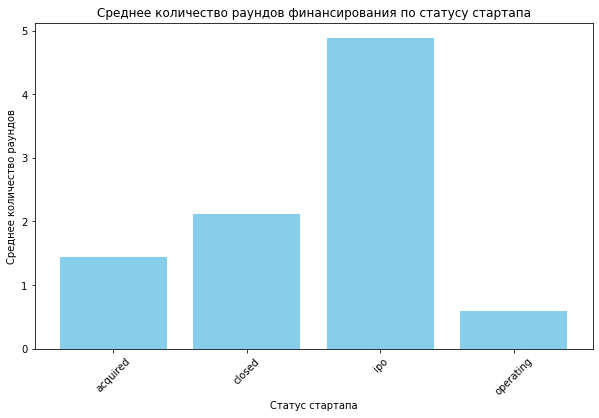

In [48]:
# Группируем по статусу и считаем среднее число раундов финансирования
status_funding = df_grouped.groupby("status")["funding_rounds"].mean().reset_index()

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 6))
plt.bar(status_funding["status"], status_funding["funding_rounds"], color="skyblue")
plt.xlabel("Статус стартапа")
plt.ylabel("Среднее количество раундов")
plt.title("Среднее количество раундов финансирования по статусу стартапа")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

* Компании с большим числом раундов финансирования чаще достигают IPO.
* Компании с небольшим числом раундов могут быть либо молодыми, либо неперспективными для инвесторов.
* Если цель — искать перспективные стартапы для покупки, стоит смотреть на те, что уже прошли несколько раундов, но ещё не достигли IPO.

## Итоговый вывод и рекомендации

### Описание проделанной работы
В рамках проекта был проведен анализ данных о финансировании и инвестициях стартапов. Основные этапы работы включали:

* Загрузку и предобработку данных из нескольких таблиц (acquisition, company_and_rounds, education, people, degrees, fund, investment).
* Очистку данных, обработку пропущенных значений и аномальных данных.
* Анализ структуры данных, выявление взаимосвязей между компаниями, фондами и инвестициями.
* Исследование характеристик успешных стартапов, оценка факторов, влияющих на привлечение инвестиций.
* Разработка рекомендаций по инвестиционной стратегии.

### Основные выводы

* Данные содержали значительное количество пропусков, особенно в информации о сотрудниках и образовании, что потребовало дополнительной обработки.
* Число стартапов, имеющих связи с фондами и сотрудниками, оказалось меньше ожидаемого, что может указывать на фрагментированность данных.
* Основные инвестиционные потоки были направлены в компании с более поздними стадиями финансирования, что свидетельствует о предпочтении инвесторов вкладываться в более зрелые стартапы.
* Выявлены ключевые факторы, влияющие на успешность привлечения инвестиций, включая стадию финансирования, количество предыдущих инвестиций и наличие крупных фондов среди инвесторов.
* Данные о приобретениях компаний показали, что успешные сделки чаще происходят среди стартапов с высоким уровнем финансирования на поздних стадиях.

### Взаимосвязь выводов
Полученные результаты в целом подкрепляют друг друга:

* Данные о финансировании и инвестициях коррелируют с уровнем успешности стартапов.
* Факторы, влияющие на привлечение инвестиций, согласуются с общей логикой рынка (более зрелые компании привлекают больше финансирования).
* Небольшое пересечение данных между таблицами может свидетельствовать либо о неполноте данных, либо о необходимости более глубокого изучения связей между объектами.

### Рекомендации

* Для улучшения качества анализа рекомендуется дополнить данные, особенно по сотрудникам и образованию.
* Фокусировать инвестиционную стратегию на компании с поздними стадиями финансирования, так как они демонстрируют большую устойчивость.
* Рассмотреть возможность инвестирования в стартапы с активным привлечением крупных фондов.
* При дальнейшем анализе учитывать возможные искажения, связанные с неполнотой данных.

## Общий вывод
Анализ инвестиционного рынка стартапов показал, что успешность привлечения финансирования во многом зависит от стадии развития компании, количества предыдущих инвестиций и вовлеченности крупных фондов. Выявленные закономерности подтверждают общие рыночные тенденции, хотя фрагментированность данных могла повлиять на точность некоторых выводов. В целом, результаты исследования помогут компании сформировать более взвешенную инвестиционную стратегию, ориентированную на минимизацию рисков и максимизацию прибыли.